In [1]:
import os
import tensorflow as tf

C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
import pandas as pd
import numpy as np

In [3]:
from tensorflow import keras

In [4]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

Using TensorFlow backend.


In [62]:
input_shape=(150,150,3)
input_width=150
input_height=150

In [63]:
nb_train_samples=160
nb_validation_samples=44
batch_size=20
epochs=10

In [64]:
train_data_dir='F:/Data_Trained/Flip robo/flipkart/Train'


In [65]:
test_data_dir='F:/Data_Trained/Flip robo/flipkart/Test'

In [66]:
# rescale the pixel values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

In [41]:
# retreive images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                         train_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary')

Found 160 images belonging to 2 classes.


In [67]:
validation_generator=datagen.flow_from_directory(
                         test_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary')

Found 40 images belonging to 2 classes.


In [78]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))





In [79]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)       

In [82]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [76]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          rotation_range=30,
                                          horizontal_flip=True)
train_generator_augmented=train_datagen_augmented.flow_from_directory(train_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary')

Found 160 images belonging to 2 classes.


In [83]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=10,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/10
8/8 [==============================] - 8s 1s/step - loss: 1.1346 - accuracy: 0.5375 - val_loss: 0.6954 - val_accuracy: 0.2500
Epoch 2/10
8/8 [==============================] - 7s 888ms/step - loss: 0.7318 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.3500
Epoch 3/10
8/8 [==============================] - 6s 808ms/step - loss: 0.6868 - accuracy: 0.5500 - val_loss: 0.6943 - val_accuracy: 0.5500
Epoch 4/10
8/8 [==============================] - 7s 910ms/step - loss: 0.6828 - accuracy: 0.5250 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 7s 814ms/step - loss: 0.6866 - accuracy: 0.6000 - val_loss: 0.6699 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 7s 825ms/step - loss: 0.6959 - accuracy: 0.5750 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 7s 860ms/step - loss: 0.6825 - accuracy: 0.5625 - val_loss: 0.6878 - val_accuracy: 0.4000
Epoch 8/10
8/8 [=======

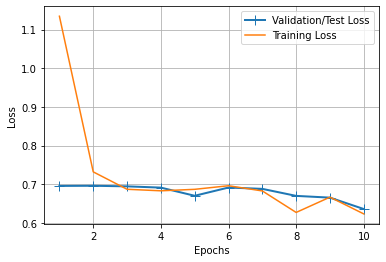

In [84]:
# Plotting our loss charts
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

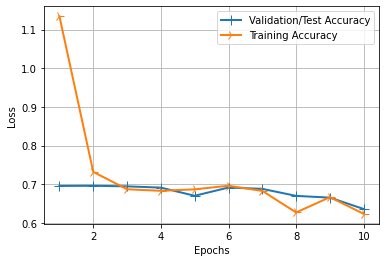

In [85]:
# Plotting accuracy Charts
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,loss_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [86]:
model.save('jeans vs Trouser')

In [50]:
from keras.preprocessing import image

In [51]:
input_image_path='F:/Data_Trained/Flip robo/flipkart/Validation/Jeans/img_0 (2).jpeg'

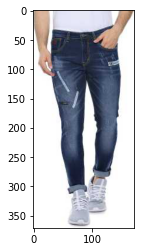

In [53]:
# Show input image
img1=image.load_img(input_image_path)
plt.imshow(img1)
img_size=(150,150)

In [54]:
img1=image.load_img(input_image_path,target_size=img_size)
image_tensor=image.img_to_array(img1)
image_tensor=image_tensor/255
image_tensor=np.expand_dims(image_tensor,axis=0)


In [55]:
# creating a model from an input tensor
from keras import models

layer_outputs=[layer.output for layer in model.layers[:9]]
activation_model=models.Model(input=model.input,outputs=layer_outputs)

C:\anaconda\envs\py36_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("co...)`
  """


In [56]:
activations=activation_model.predict(image_tensor)

In [57]:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


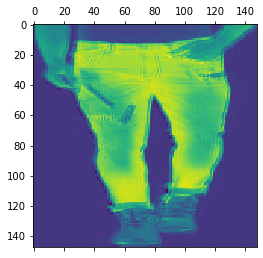

In [58]:
plt.matshow(first_layer_activation[0,:,:, 1],cmap='viridis')

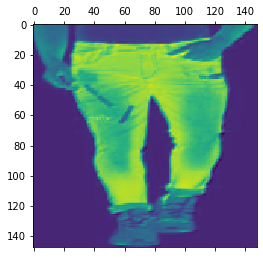

In [59]:
# look at 5 channel

plt.matshow(first_layer_activation[0,:,:, 5],cmap='viridis')

C:\anaconda\envs\py36_test\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


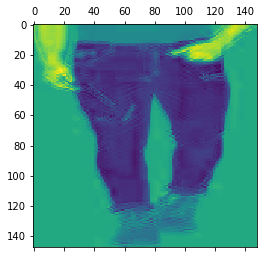

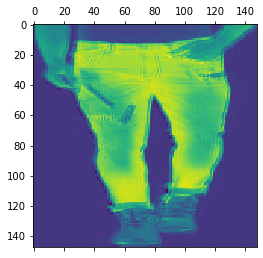

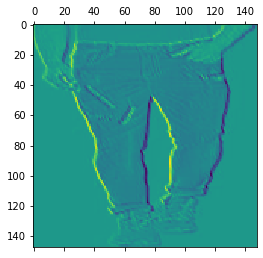

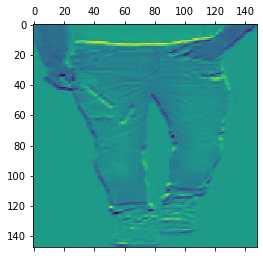

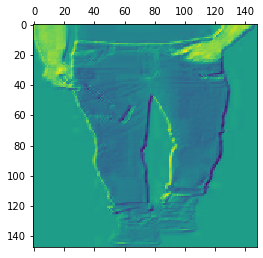

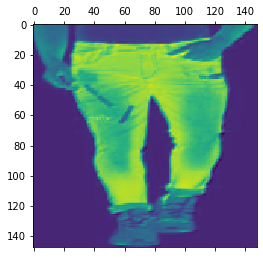

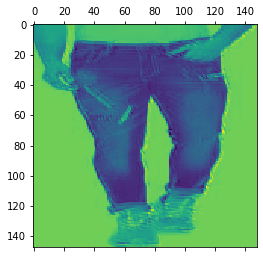

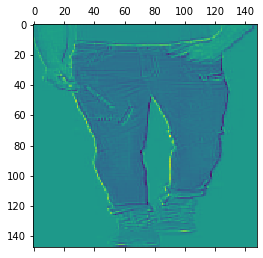

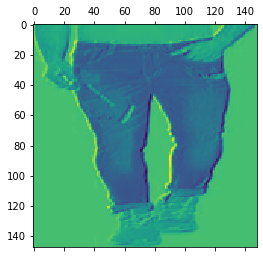

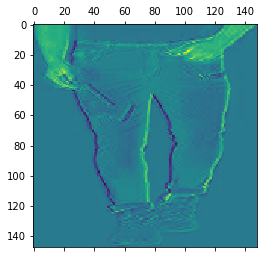

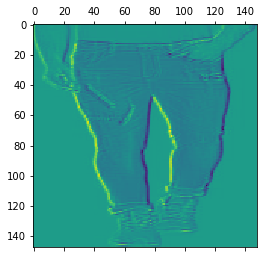

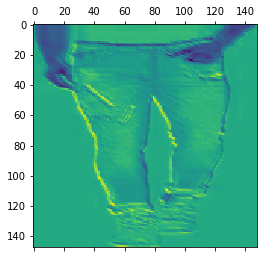

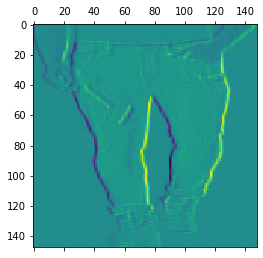

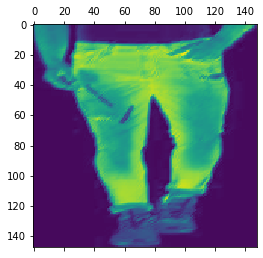

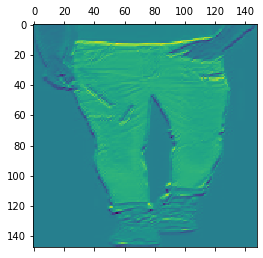

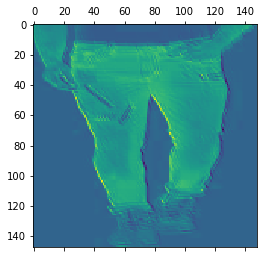

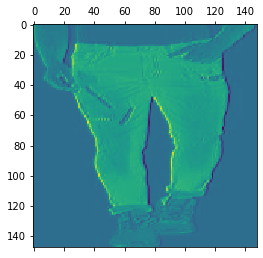

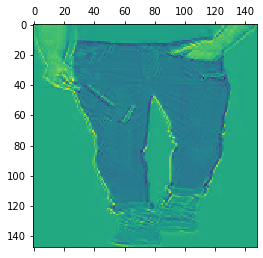

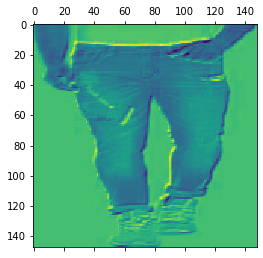

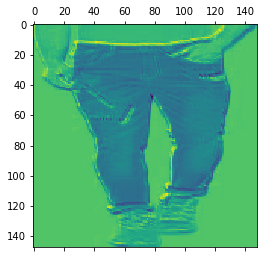

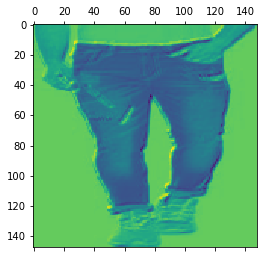

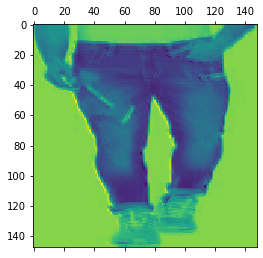

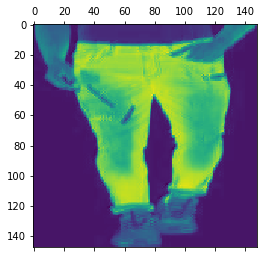

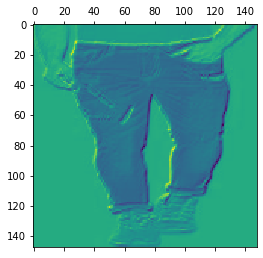

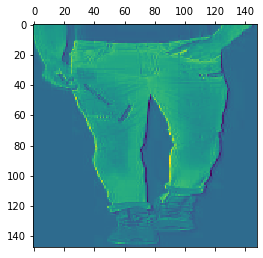

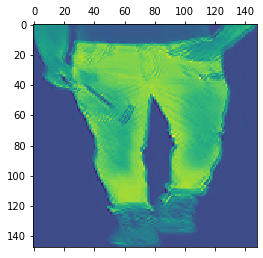

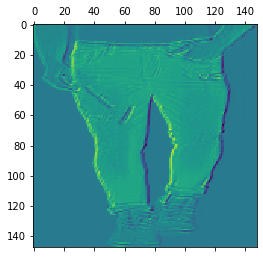

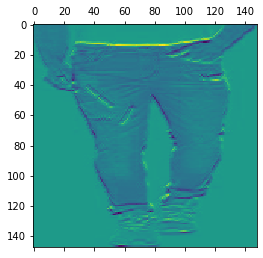

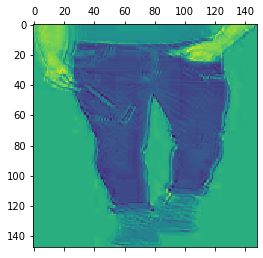

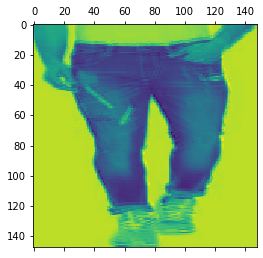

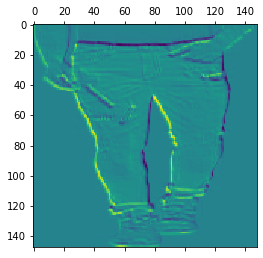

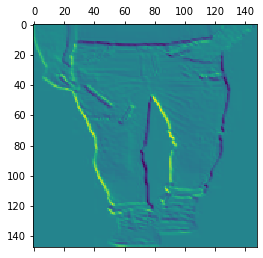

In [60]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0,:,:, i],cmap='viridis')